In [1]:
import shap

ModuleNotFoundError: No module named 'shap'

In [3]:
import json

In [4]:
import numpy as np

In [5]:
shap.initjs()

NameError: name 'shap' is not defined

In [5]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import keras.backend as K
import numpy as np
import json

Using TensorFlow backend.


In [17]:
import tensorflow as tf

(506, 13)

In [7]:
tf.__version__

'1.12.0'

In [8]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


In [9]:
'''Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
with tf.Session( config = tf.ConfigProto( log_device_placement = True ) ):
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11493376/11490434 [==============================] - ETA:  - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 59s - ETA: 49 - ETA: 41 - ETA: 33 - ETA: 28 - ETA: 20 - ETA: 16 - ETA: 16 - ETA: 11 - ETA: 8 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 4s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
26240/60000 [============>.................] - ETA: 5:18 - loss: 2.3076 - acc: 0.101 - ETA: 3:26 - loss: 2.2664 - acc: 0.152 - ETA: 2:48 - loss: 2.2297 - acc: 0.177 - ETA: 2:29 - loss: 2.1786 - acc: 0.220 - ETA: 2:18 - loss: 2.1218 - acc: 0.251 - ETA: 2:11 - loss: 2.0331 - acc: 0.294 - ETA: 2:05 - loss: 1.9860 - acc: 0.310 - ETA: 2:01 - loss: 1.9736 - acc: 0.319 - ETA: 1:57 - loss: 1.9594 - acc: 0.326 - ETA: 1:55 - loss: 1.9190 - acc: 0.348 - ETA: 1:53 - loss: 1.8686 - acc: 0.372 - ETA: 1:51 - loss: 1.8306 - acc: 0.387 - ETA: 1:49 - loss: 1.7960 - acc: 

26368/60000 [============>.................] - ETA: 1:34 - loss: 0.0934 - acc: 0.976 - ETA: 1:34 - loss: 0.1145 - acc: 0.972 - ETA: 1:34 - loss: 0.1057 - acc: 0.971 - ETA: 1:33 - loss: 0.0964 - acc: 0.972 - ETA: 1:34 - loss: 0.0980 - acc: 0.970 - ETA: 1:33 - loss: 0.1040 - acc: 0.971 - ETA: 1:33 - loss: 0.1150 - acc: 0.969 - ETA: 1:33 - loss: 0.1086 - acc: 0.969 - ETA: 1:32 - loss: 0.1097 - acc: 0.967 - ETA: 1:32 - loss: 0.1053 - acc: 0.968 - ETA: 1:32 - loss: 0.1063 - acc: 0.968 - ETA: 1:32 - loss: 0.1063 - acc: 0.967 - ETA: 1:31 - loss: 0.1055 - acc: 0.966 - ETA: 1:31 - loss: 0.1025 - acc: 0.968 - ETA: 1:31 - loss: 0.0990 - acc: 0.969 - ETA: 1:31 - loss: 0.0954 - acc: 0.971 - ETA: 1:30 - loss: 0.0933 - acc: 0.972 - ETA: 1:30 - loss: 0.0942 - acc: 0.971 - ETA: 1:30 - loss: 0.0959 - acc: 0.971 - ETA: 1:30 - loss: 0.0982 - acc: 0.970 - ETA: 1:30 - loss: 0.0950 - acc: 0.971 - ETA: 1:29 - loss: 0.0935 - acc: 0.971 - ETA: 1:29 - loss: 0.0976 - acc: 0.970 - ETA: 1:29 - loss: 0.0969 - acc: 0

60000/60000 [==============================] - ETA: 9s - loss: 0.0938 - acc: 0.972 - ETA: 9s - loss: 0.0937 - acc: 0.972 - ETA: 9s - loss: 0.0936 - acc: 0.972 - ETA: 8s - loss: 0.0936 - acc: 0.972 - ETA: 8s - loss: 0.0936 - acc: 0.972 - ETA: 8s - loss: 0.0935 - acc: 0.972 - ETA: 8s - loss: 0.0935 - acc: 0.972 - ETA: 8s - loss: 0.0934 - acc: 0.972 - ETA: 7s - loss: 0.0933 - acc: 0.972 - ETA: 7s - loss: 0.0934 - acc: 0.972 - ETA: 7s - loss: 0.0932 - acc: 0.972 - ETA: 7s - loss: 0.0931 - acc: 0.972 - ETA: 7s - loss: 0.0930 - acc: 0.972 - ETA: 6s - loss: 0.0929 - acc: 0.972 - ETA: 6s - loss: 0.0929 - acc: 0.972 - ETA: 6s - loss: 0.0928 - acc: 0.972 - ETA: 6s - loss: 0.0929 - acc: 0.972 - ETA: 6s - loss: 0.0930 - acc: 0.972 - ETA: 5s - loss: 0.0932 - acc: 0.972 - ETA: 5s - loss: 0.0932 - acc: 0.972 - ETA: 5s - loss: 0.0931 - acc: 0.972 - ETA: 5s - loss: 0.0932 - acc: 0.972 - ETA: 5s - loss: 0.0930 - acc: 0.972 - ETA: 4s - loss: 0.0930 - acc: 0.972 - ETA: 4s - loss: 0.0930 - acc: 0.972 - ETA

26240/60000 [============>.................] - ETA: 1:34 - loss: 0.0462 - acc: 0.976 - ETA: 1:35 - loss: 0.0521 - acc: 0.976 - ETA: 1:36 - loss: 0.0522 - acc: 0.981 - ETA: 1:36 - loss: 0.0430 - acc: 0.986 - ETA: 1:37 - loss: 0.0419 - acc: 0.985 - ETA: 1:39 - loss: 0.0525 - acc: 0.983 - ETA: 1:40 - loss: 0.0498 - acc: 0.984 - ETA: 1:40 - loss: 0.0475 - acc: 0.984 - ETA: 1:41 - loss: 0.0482 - acc: 0.983 - ETA: 1:40 - loss: 0.0504 - acc: 0.982 - ETA: 1:39 - loss: 0.0509 - acc: 0.980 - ETA: 1:38 - loss: 0.0487 - acc: 0.981 - ETA: 1:37 - loss: 0.0495 - acc: 0.980 - ETA: 1:37 - loss: 0.0478 - acc: 0.981 - ETA: 1:36 - loss: 0.0484 - acc: 0.981 - ETA: 1:35 - loss: 0.0489 - acc: 0.982 - ETA: 1:35 - loss: 0.0561 - acc: 0.981 - ETA: 1:34 - loss: 0.0541 - acc: 0.982 - ETA: 1:34 - loss: 0.0593 - acc: 0.981 - ETA: 1:34 - loss: 0.0600 - acc: 0.981 - ETA: 1:33 - loss: 0.0592 - acc: 0.981 - ETA: 1:33 - loss: 0.0596 - acc: 0.981 - ETA: 1:32 - loss: 0.0601 - acc: 0.981 - ETA: 1:32 - loss: 0.0615 - acc: 0

60000/60000 [==============================] - ETA: 9s - loss: 0.0551 - acc: 0.983 - ETA: 9s - loss: 0.0550 - acc: 0.983 - ETA: 9s - loss: 0.0550 - acc: 0.983 - ETA: 9s - loss: 0.0550 - acc: 0.983 - ETA: 8s - loss: 0.0549 - acc: 0.983 - ETA: 8s - loss: 0.0550 - acc: 0.983 - ETA: 8s - loss: 0.0551 - acc: 0.983 - ETA: 8s - loss: 0.0552 - acc: 0.983 - ETA: 8s - loss: 0.0552 - acc: 0.983 - ETA: 7s - loss: 0.0552 - acc: 0.983 - ETA: 7s - loss: 0.0550 - acc: 0.983 - ETA: 7s - loss: 0.0550 - acc: 0.983 - ETA: 7s - loss: 0.0549 - acc: 0.983 - ETA: 7s - loss: 0.0548 - acc: 0.983 - ETA: 6s - loss: 0.0549 - acc: 0.983 - ETA: 6s - loss: 0.0549 - acc: 0.983 - ETA: 6s - loss: 0.0548 - acc: 0.983 - ETA: 6s - loss: 0.0548 - acc: 0.983 - ETA: 6s - loss: 0.0549 - acc: 0.983 - ETA: 5s - loss: 0.0549 - acc: 0.983 - ETA: 5s - loss: 0.0549 - acc: 0.983 - ETA: 5s - loss: 0.0548 - acc: 0.983 - ETA: 5s - loss: 0.0548 - acc: 0.983 - ETA: 5s - loss: 0.0548 - acc: 0.983 - ETA: 4s - loss: 0.0549 - acc: 0.983 - ETA

26368/60000 [============>.................] - ETA: 1:34 - loss: 0.0227 - acc: 0.992 - ETA: 1:33 - loss: 0.0222 - acc: 0.988 - ETA: 1:32 - loss: 0.0202 - acc: 0.992 - ETA: 1:32 - loss: 0.0163 - acc: 0.994 - ETA: 1:32 - loss: 0.0177 - acc: 0.993 - ETA: 1:32 - loss: 0.0208 - acc: 0.992 - ETA: 1:32 - loss: 0.0204 - acc: 0.992 - ETA: 1:31 - loss: 0.0263 - acc: 0.990 - ETA: 1:31 - loss: 0.0271 - acc: 0.989 - ETA: 1:31 - loss: 0.0264 - acc: 0.989 - ETA: 1:31 - loss: 0.0282 - acc: 0.988 - ETA: 1:31 - loss: 0.0288 - acc: 0.987 - ETA: 1:30 - loss: 0.0350 - acc: 0.986 - ETA: 1:30 - loss: 0.0344 - acc: 0.986 - ETA: 1:30 - loss: 0.0405 - acc: 0.985 - ETA: 1:30 - loss: 0.0402 - acc: 0.985 - ETA: 1:30 - loss: 0.0395 - acc: 0.985 - ETA: 1:30 - loss: 0.0394 - acc: 0.985 - ETA: 1:29 - loss: 0.0416 - acc: 0.986 - ETA: 1:29 - loss: 0.0403 - acc: 0.986 - ETA: 1:29 - loss: 0.0389 - acc: 0.987 - ETA: 1:29 - loss: 0.0384 - acc: 0.987 - ETA: 1:29 - loss: 0.0377 - acc: 0.987 - ETA: 1:28 - loss: 0.0378 - acc: 0

60000/60000 [==============================] - ETA: 9s - loss: 0.0410 - acc: 0.987 - ETA: 9s - loss: 0.0410 - acc: 0.987 - ETA: 9s - loss: 0.0410 - acc: 0.987 - ETA: 8s - loss: 0.0410 - acc: 0.987 - ETA: 8s - loss: 0.0410 - acc: 0.987 - ETA: 8s - loss: 0.0409 - acc: 0.987 - ETA: 8s - loss: 0.0410 - acc: 0.987 - ETA: 8s - loss: 0.0410 - acc: 0.987 - ETA: 7s - loss: 0.0410 - acc: 0.987 - ETA: 7s - loss: 0.0411 - acc: 0.987 - ETA: 7s - loss: 0.0410 - acc: 0.987 - ETA: 7s - loss: 0.0411 - acc: 0.987 - ETA: 7s - loss: 0.0413 - acc: 0.987 - ETA: 6s - loss: 0.0412 - acc: 0.987 - ETA: 6s - loss: 0.0413 - acc: 0.987 - ETA: 6s - loss: 0.0413 - acc: 0.987 - ETA: 6s - loss: 0.0413 - acc: 0.987 - ETA: 6s - loss: 0.0413 - acc: 0.987 - ETA: 5s - loss: 0.0413 - acc: 0.987 - ETA: 5s - loss: 0.0412 - acc: 0.987 - ETA: 5s - loss: 0.0414 - acc: 0.987 - ETA: 5s - loss: 0.0414 - acc: 0.987 - ETA: 5s - loss: 0.0415 - acc: 0.987 - ETA: 4s - loss: 0.0415 - acc: 0.987 - ETA: 4s - loss: 0.0415 - acc: 0.987 - ETA

26240/60000 [============>.................] - ETA: 1:32 - loss: 0.0187 - acc: 0.992 - ETA: 1:32 - loss: 0.0407 - acc: 0.988 - ETA: 1:38 - loss: 0.0341 - acc: 0.989 - ETA: 1:40 - loss: 0.0383 - acc: 0.990 - ETA: 1:40 - loss: 0.0405 - acc: 0.989 - ETA: 1:39 - loss: 0.0391 - acc: 0.988 - ETA: 1:40 - loss: 0.0391 - acc: 0.987 - ETA: 1:39 - loss: 0.0369 - acc: 0.988 - ETA: 1:40 - loss: 0.0526 - acc: 0.985 - ETA: 1:39 - loss: 0.0480 - acc: 0.986 - ETA: 1:39 - loss: 0.0447 - acc: 0.987 - ETA: 1:40 - loss: 0.0433 - acc: 0.987 - ETA: 1:41 - loss: 0.0415 - acc: 0.988 - ETA: 1:41 - loss: 0.0446 - acc: 0.987 - ETA: 1:40 - loss: 0.0432 - acc: 0.988 - ETA: 1:39 - loss: 0.0418 - acc: 0.988 - ETA: 1:38 - loss: 0.0401 - acc: 0.989 - ETA: 1:38 - loss: 0.0392 - acc: 0.989 - ETA: 1:38 - loss: 0.0385 - acc: 0.989 - ETA: 1:37 - loss: 0.0369 - acc: 0.990 - ETA: 1:37 - loss: 0.0358 - acc: 0.990 - ETA: 1:38 - loss: 0.0356 - acc: 0.990 - ETA: 1:39 - loss: 0.0351 - acc: 0.990 - ETA: 1:39 - loss: 0.0348 - acc: 0

60000/60000 [==============================] - ETA: 9s - loss: 0.0354 - acc: 0.989 - ETA: 9s - loss: 0.0354 - acc: 0.989 - ETA: 9s - loss: 0.0353 - acc: 0.989 - ETA: 9s - loss: 0.0354 - acc: 0.989 - ETA: 8s - loss: 0.0354 - acc: 0.989 - ETA: 8s - loss: 0.0353 - acc: 0.989 - ETA: 8s - loss: 0.0353 - acc: 0.989 - ETA: 8s - loss: 0.0354 - acc: 0.989 - ETA: 8s - loss: 0.0353 - acc: 0.989 - ETA: 7s - loss: 0.0354 - acc: 0.989 - ETA: 7s - loss: 0.0356 - acc: 0.989 - ETA: 7s - loss: 0.0355 - acc: 0.989 - ETA: 7s - loss: 0.0355 - acc: 0.989 - ETA: 7s - loss: 0.0355 - acc: 0.989 - ETA: 6s - loss: 0.0355 - acc: 0.989 - ETA: 6s - loss: 0.0354 - acc: 0.989 - ETA: 6s - loss: 0.0355 - acc: 0.989 - ETA: 6s - loss: 0.0354 - acc: 0.989 - ETA: 6s - loss: 0.0354 - acc: 0.989 - ETA: 5s - loss: 0.0354 - acc: 0.989 - ETA: 5s - loss: 0.0354 - acc: 0.989 - ETA: 5s - loss: 0.0353 - acc: 0.989 - ETA: 5s - loss: 0.0353 - acc: 0.989 - ETA: 5s - loss: 0.0353 - acc: 0.989 - ETA: 4s - loss: 0.0353 - acc: 0.989 - ETA

26368/60000 [============>.................] - ETA: 1:32 - loss: 0.0221 - acc: 0.992 - ETA: 1:33 - loss: 0.0352 - acc: 0.988 - ETA: 1:33 - loss: 0.0340 - acc: 0.987 - ETA: 1:33 - loss: 0.0299 - acc: 0.988 - ETA: 1:32 - loss: 0.0299 - acc: 0.989 - ETA: 1:32 - loss: 0.0288 - acc: 0.989 - ETA: 1:32 - loss: 0.0344 - acc: 0.990 - ETA: 1:32 - loss: 0.0326 - acc: 0.990 - ETA: 1:32 - loss: 0.0360 - acc: 0.987 - ETA: 1:31 - loss: 0.0373 - acc: 0.986 - ETA: 1:31 - loss: 0.0344 - acc: 0.987 - ETA: 1:31 - loss: 0.0330 - acc: 0.988 - ETA: 1:31 - loss: 0.0308 - acc: 0.989 - ETA: 1:31 - loss: 0.0287 - acc: 0.990 - ETA: 1:31 - loss: 0.0300 - acc: 0.989 - ETA: 1:31 - loss: 0.0322 - acc: 0.988 - ETA: 1:31 - loss: 0.0309 - acc: 0.989 - ETA: 1:30 - loss: 0.0294 - acc: 0.989 - ETA: 1:30 - loss: 0.0293 - acc: 0.989 - ETA: 1:30 - loss: 0.0322 - acc: 0.989 - ETA: 1:30 - loss: 0.0316 - acc: 0.989 - ETA: 1:29 - loss: 0.0309 - acc: 0.989 - ETA: 1:29 - loss: 0.0307 - acc: 0.989 - ETA: 1:29 - loss: 0.0301 - acc: 0

KeyboardInterrupt: 

In [14]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 8, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])



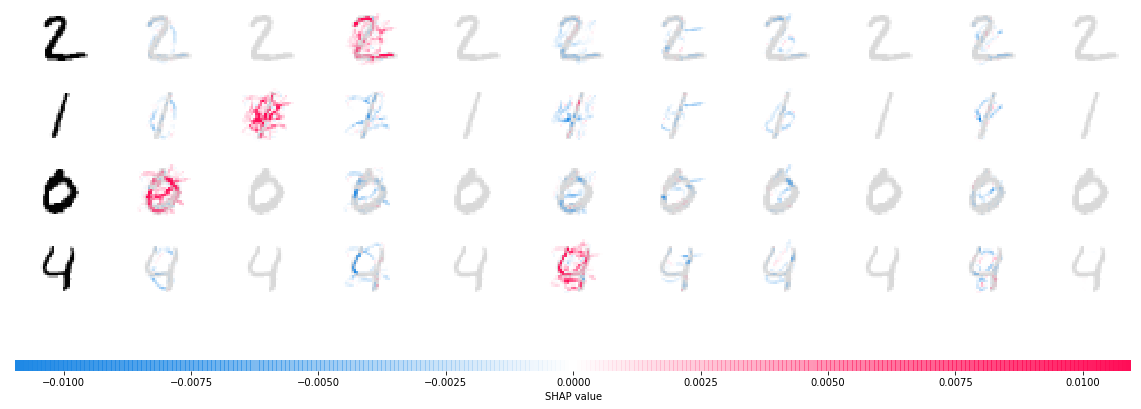

In [15]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])


In [17]:
x_train.shape

(60000, 28, 28, 1)

In [18]:
background.shape

(8, 28, 28, 1)

In [19]:
model.shape

AttributeError: 'Sequential' object has no attribute 'shape'

In [20]:
x_test.shape

(10000, 28, 28, 1)

438304768/553467096 [======================>.......] - ETA: 2:20:1 - ETA: 1:27:2 - ETA: 1:29:4 - ETA: 1:14:4 - ETA: 1:00:3 - ETA: 47:48  - ETA: 30:3 - ETA: 19:1 - ETA: 17:4 - ETA: 17:5 - ETA: 11:1 - ETA: 10:3 - ETA: 6:4 - ETA: 6: - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: 

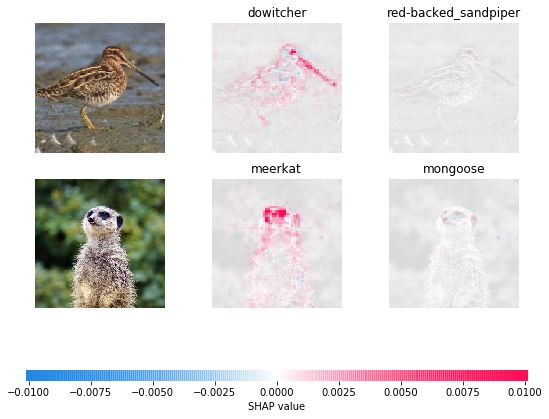

In [22]:
# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)
X,y = shap.datasets.imagenet50()
to_explain = X[[39,41]]

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)
e = shap.GradientExplainer(
    (model.layers[7].input, model.layers[-1].output),
    map2layer(X, 7),
    local_smoothing=0 # std dev of smoothing noise
)
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)

# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# plot the explanations
shap.image_plot(shap_values, to_explain, index_names)

In [1]:
index_names

NameError: name 'index_names' is not defined